In [2]:
train_path = './data_train'
test_path = './data_test'

from keras.preprocessing.image import ImageDataGenerator

# 图片预处理/增强（归一化、缩放、平移、旋转等）
datagen = ImageDataGenerator(rescale=1 / 255)
# 加载训练数据集、测试数据集
train_set = datagen.flow_from_directory(
    directory=train_path,
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary'
)
test_set = datagen.flow_from_directory(
    directory=test_path,
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
type(train_set)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [4]:
train_set

In [5]:
# 建立CNN模型
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
cnn_model = Sequential()

# Convolution: 32 filters, size=(3, 3), stride=(1, 1)
cnn_model.add(
    Conv2D(
        input_shape=(50, 50, 3),
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu'
    )
)
# Max-Pooling: size=(2, 2), stride=(1, 1)
cnn_model.add(
    MaxPool2D(
        pool_size=(2, 2),
        strides = (2, 2)
    )
)
# Convolution: 32 filters, size=(3, 3), stride=(1, 1)
cnn_model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu'
    )
)
# Max-Pooling: size=(2, 2), stride=(1, 1)
cnn_model.add(
    MaxPool2D(
        pool_size=(2, 2),
        strides = (3, 3)
    )
)
# Flatten
cnn_model.add(Flatten())
# MLP
cnn_model.add(
    Dense(
        units=128,
        activation='relu'
    )
)
# Output
cnn_model.add(
    Dense(
        units=1,
        activation='sigmoid'
    )
)
# 损失函数和最优化方法配置
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 查看模型结构
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [6]:
# fit
cnn_model.fit_generator(
    generator=train_set,
    steps_per_epoch=100,
    epochs=40
)
# train_score
train_accuracy_score = cnn_model.evaluate_generator(train_set, steps=1)
print(train_accuracy_score)

Epoch 1/40
100/100 [==============================] - 20s 200ms/step - loss: 0.6855 - acc: 0.5328
Epoch 2/40
100/100 [==============================] - 24s 237ms/step - loss: 0.6574 - acc: 0.6125
Epoch 3/40
100/100 [==============================] - 21s 211ms/step - loss: 0.6170 - acc: 0.6591
Epoch 4/40
100/100 [==============================] - 20s 202ms/step - loss: 0.5940 - acc: 0.6891
Epoch 5/40
100/100 [==============================] - 20s 205ms/step - loss: 0.5728 - acc: 0.7016
Epoch 6/40
100/100 [==============================] - 22s 215ms/step - loss: 0.5388 - acc: 0.7159
Epoch 7/40
100/100 [==============================] - 21s 205ms/step - loss: 0.5211 - acc: 0.7459
Epoch 8/40
100/100 [==============================] - 20s 204ms/step - loss: 0.5076 - acc: 0.7444
Epoch 9/40
100/100 [==============================] - 20s 205ms/step - loss: 0.4922 - acc: 0.75471s - loss: 0.4970 - acc
Epoch 10/40
100/100 [==============================] - 20s 204ms/step - loss: 0.4826 - acc: 0.7

In [10]:
# test_score
# CNN需要非常大的样本量，应该通过对图像增强（缩放、平移、旋转），得到更多样本
test_accuracy_score = cnn_model.evaluate_generator(test_set, steps=1)
print(test_accuracy_score)

[0.5019485354423523, 0.78125]


In [11]:
print(train_set.class_indices)
result = {
    0: 'cat',
    1: 'dog'
}

{'cat': 0, 'dog': 1}


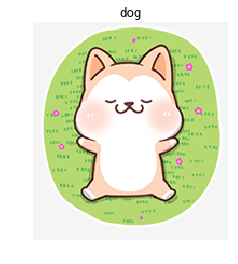

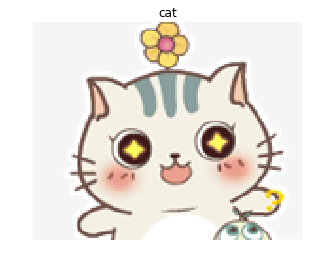

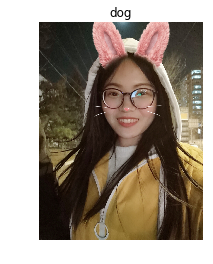

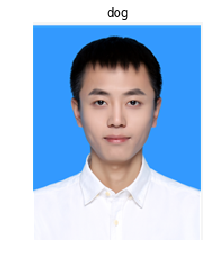

In [12]:
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt

def predict(path):
    dog_image = load_img(
        path=path,
        target_size=(50, 50)
    )
    dog_array = img_to_array(dog_image)
    dog_data_normal = dog_array / 255
    dog_input_data = dog_data_normal.reshape(1, 50, 50, 3)  # RGB

    result_value = cnn_model.predict_classes(dog_input_data)

    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(result[result_value[0, 0]])
    plt.show()


paths = [
    './pictures/正在睡觉的狗子.png',
    './pictures/喵喵.png',
    './pictures/媳妇儿.jpg',
    './pictures/自己.png'
]
for path in paths:
    predict(path)